In [ ]:
%pip install pandas

In [ ]:
%pip install matplotlib

In [ ]:
%pip install seaborn

In [4]:
import seaborn as sns

In [5]:
import numpy as np

import matplotlib.pyplot as plt

In [6]:
import pandas as pd

1. Padronizando o DataFrame: Limpeza e alteração de dados incorretos.

In [7]:
order_payments = pd.read_csv('../data/data_csv/olist_order_payments_dataset.csv')

order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [8]:
order_payments.shape

(103886, 5)

In [9]:
order_payments.head(7)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16


In [10]:
total_null =order_payments.isnull().sum()

print(f'Total de valores nulos:\n{total_null}')

Total de valores nulos:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [11]:
total_null =order_payments.isna().sum()

print(f'Total de valores nulos:\n{total_null}')

Total de valores nulos:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [12]:
total_null =order_payments.duplicated().sum()

print(f'Total de valores nulos:\n{total_null}')

Total de valores nulos:
0


In [35]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

2. Realizando análise exploratória

In [13]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [14]:
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

Foram detectados dois dados com inconsistência: 'boleto' e 'not_defined'

In [15]:
not_defined_payments = order_payments[order_payments['payment_type'] == 'not_defined']

not_defined_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


Deletando os registros de 'payment_type' = 'not_defined'

In [16]:
order_payments = order_payments[order_payments['payment_type'] != 'not_defined']


In [17]:
boleto_payments = order_payments[order_payments['payment_type'] == 'boleto']

boleto_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95
24,8cd68144cdb62dc0d60848cf8616d2a4,1,boleto,1,330.66
29,b69b9260e79a0da00e15f48de1bd2524,1,boleto,1,283.34
39,00d8d65b666158b633f96054d31af43b,1,boleto,1,130.88
42,32b1d8f3789a57f1f752e20ac7404b4c,1,boleto,1,56.60
...,...,...,...,...,...
103830,8ddf10ae2f0c4148e4cd1fbd889a7ebc,1,boleto,1,150.14
103854,bd1d2815016a0d22c926101c1c99d140,1,boleto,1,94.99
103867,d5639d8a973cec351be75a3186835068,1,boleto,1,160.89
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31


Irei modificar o nome de 'boleto' para 'payment_slip' para seguir o padrão de idioma 

In [18]:
order_payments['payment_type'].replace('boleto', 'payment_slip', inplace=True)

/tmp/ipykernel_7188/2811221989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_payments['payment_type'].replace('boleto', 'payment_slip', inplace=True)


In [19]:
boleto_payments = order_payments[order_payments['payment_type'] == 'payment_slip']

boleto_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
9,0573b5e23cbd798006520e1d5b4c6714,1,payment_slip,1,51.95
24,8cd68144cdb62dc0d60848cf8616d2a4,1,payment_slip,1,330.66
29,b69b9260e79a0da00e15f48de1bd2524,1,payment_slip,1,283.34
39,00d8d65b666158b633f96054d31af43b,1,payment_slip,1,130.88
42,32b1d8f3789a57f1f752e20ac7404b4c,1,payment_slip,1,56.60
...,...,...,...,...,...
103830,8ddf10ae2f0c4148e4cd1fbd889a7ebc,1,payment_slip,1,150.14
103854,bd1d2815016a0d22c926101c1c99d140,1,payment_slip,1,94.99
103867,d5639d8a973cec351be75a3186835068,1,payment_slip,1,160.89
103881,0406037ad97740d563a178ecc7a2075c,1,payment_slip,1,363.31


In [20]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,payment_slip,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


3. Detectando e removendo possíveis Outliers.

In [21]:
order_payments[['payment_value', 'payment_installments']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
payment_value,103883.0,154.104831,217.495628,0.0,56.8,100.0,171.84,13664.08
payment_installments,103883.0,2.853402,2.687071,0.0,1.0,1.0,4.00,24.00


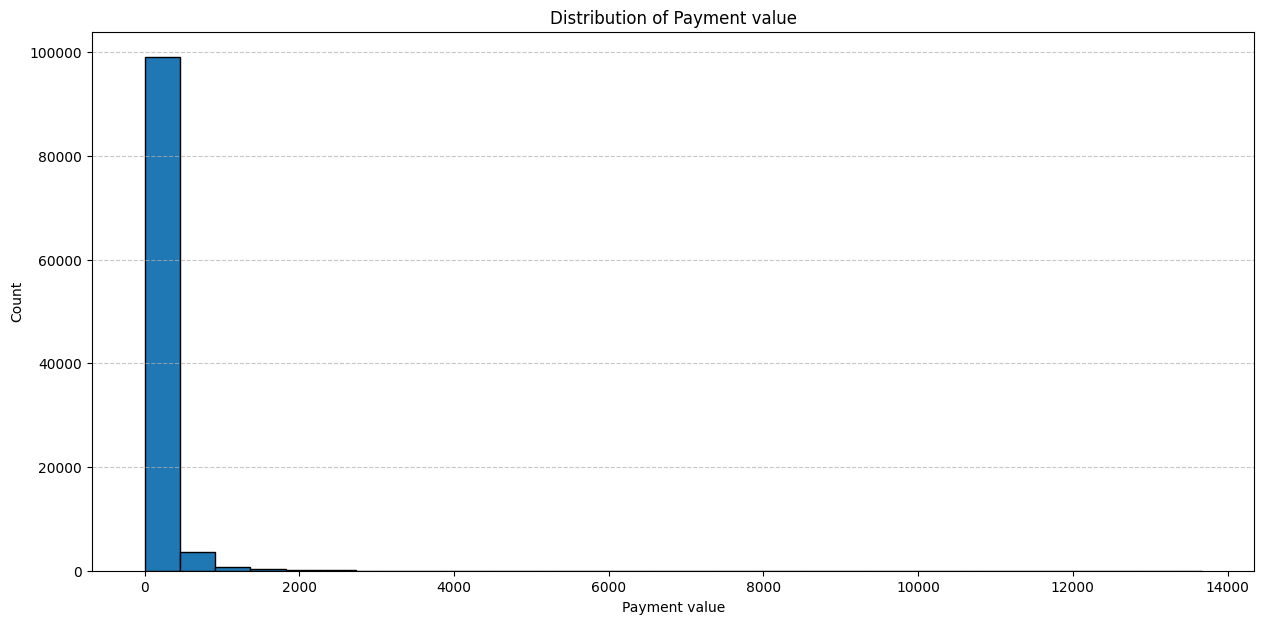

In [22]:
plt.figure(figsize=(15, 7))
plt.hist(order_payments['payment_value'], bins=30, edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Payment value')
plt.xlabel('Payment value')
plt.ylabel('Count')
plt.show()

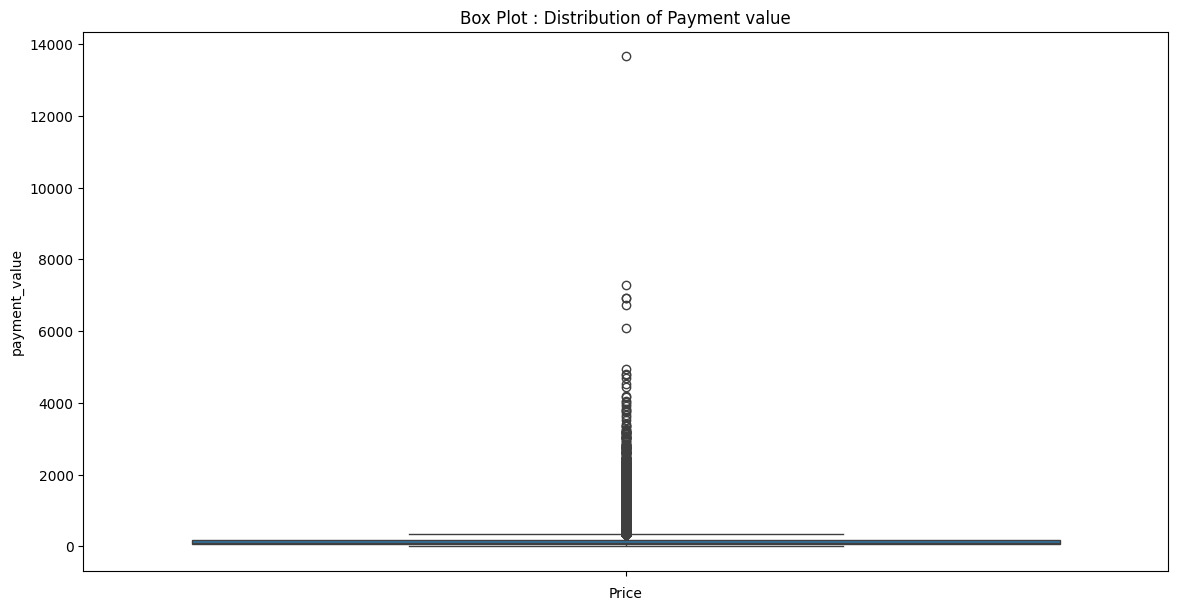

In [23]:
plt.figure(figsize=(14,7))
sns.boxplot(order_payments['payment_value'])
plt.title('Box Plot : Distribution of Payment value')
plt.xlabel('Price')
plt.show()

<Figure size 960x720 with 0 Axes>

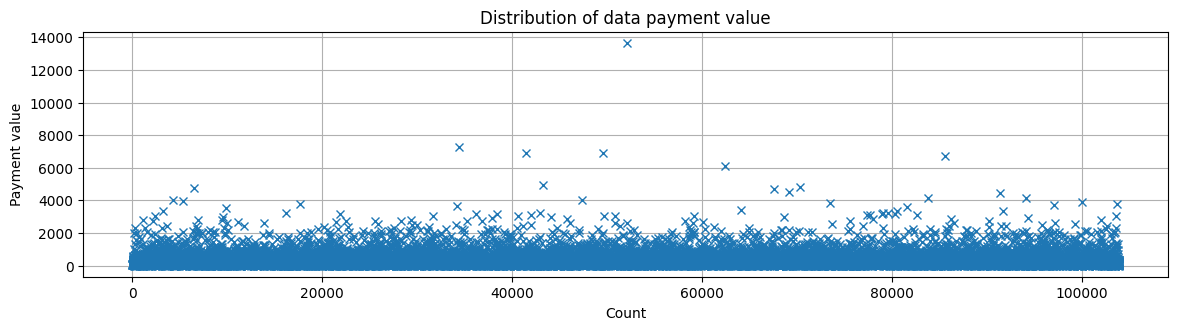

In [24]:
plt.figure(dpi=150)
plt.figure(figsize=(14,7))
plt.subplot(212)
plt.plot(order_payments['payment_value'], 'x')
plt.title('Distribution of data payment value')
plt.ylabel('Payment value')
plt.xlabel('Count')
plt.grid()
plt.show()

In [25]:
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)

print('Q1: %.2f' %Q1, '(Quartil inferior)')
print('Q3: %.2f' %Q3, '(Quartil superior)')

Q1: 56.80 (Quartil inferior)
Q3: 171.84 (Quartil superior)


In [26]:
C = 1.5

IQR = Q3 - Q1
IL = Q1 - C * IQR
UL = Q3 + C * IQR

print('Intervalo Interquartil: %.2f' %IQR)
print('Limites:')
print(' Limite inferior: %.2f' %IL)
print(' Limite superior: %.2f' %UL)
      

Intervalo Interquartil: 115.04
Limites:
 Limite inferior: -115.76
 Limite superior: 344.40


In [27]:
order_payments = order_payments[order_payments['payment_value'] < UL]

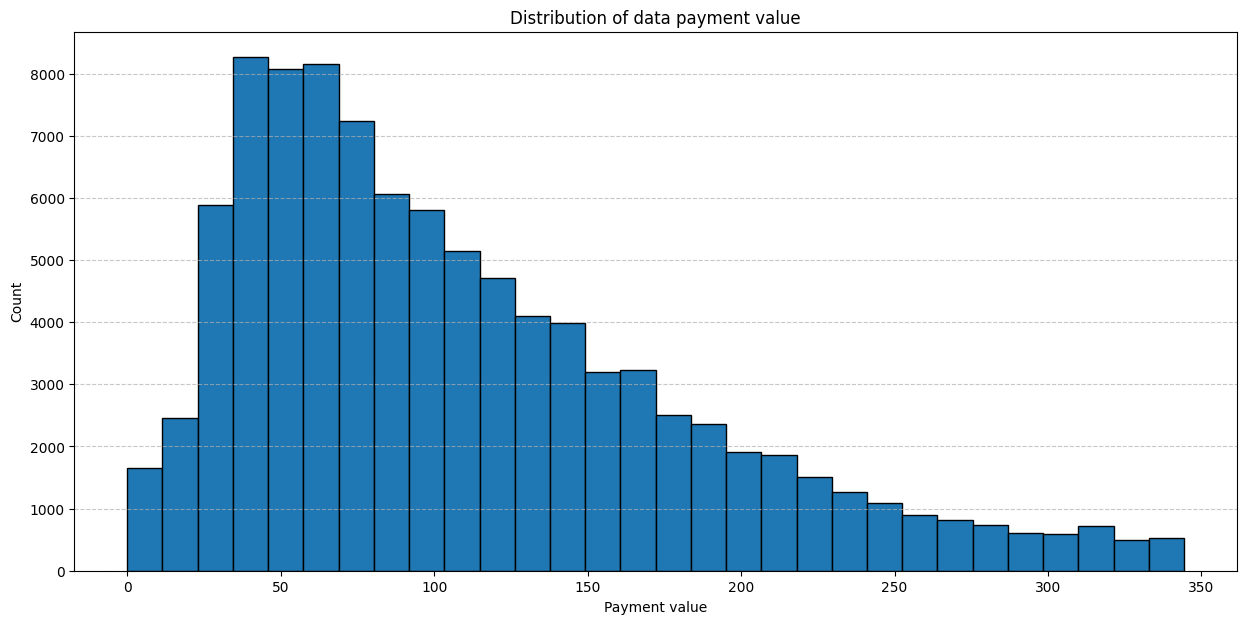

In [28]:
plt.figure(figsize=(15, 7))
plt.hist(order_payments['payment_value'], bins=30, edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of data payment value')
plt.xlabel('Payment value')
plt.ylabel('Count')
plt.show()

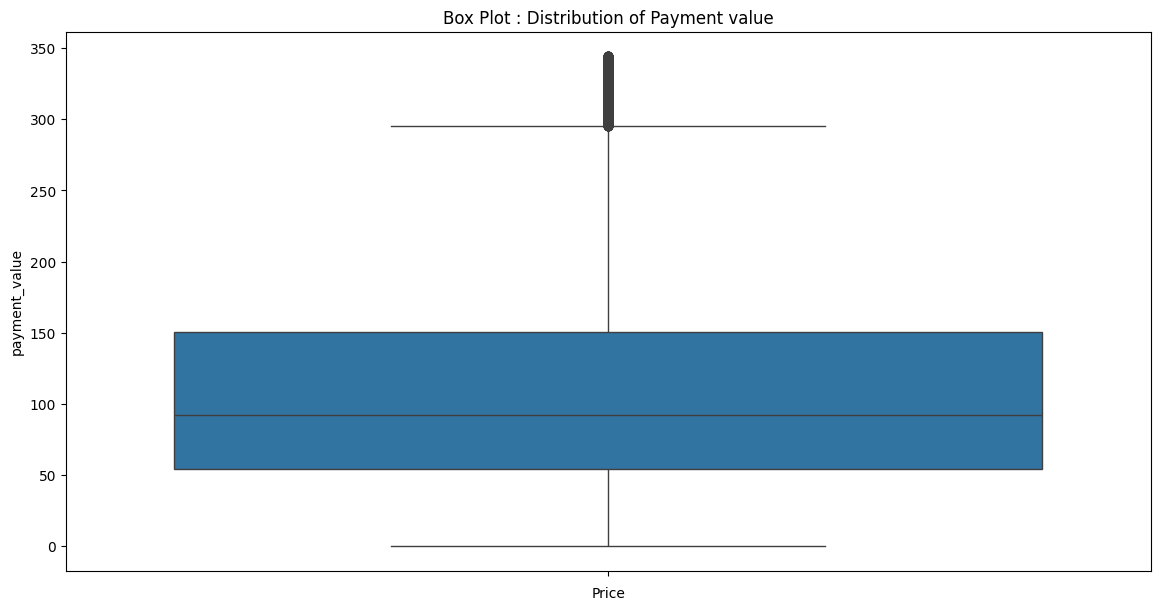

In [29]:
plt.figure(figsize=(14,7))
sns.boxplot(order_payments['payment_value'])
plt.title('Box Plot : Distribution of Payment value')
plt.xlabel('Price')
plt.show()

<Figure size 960x720 with 0 Axes>

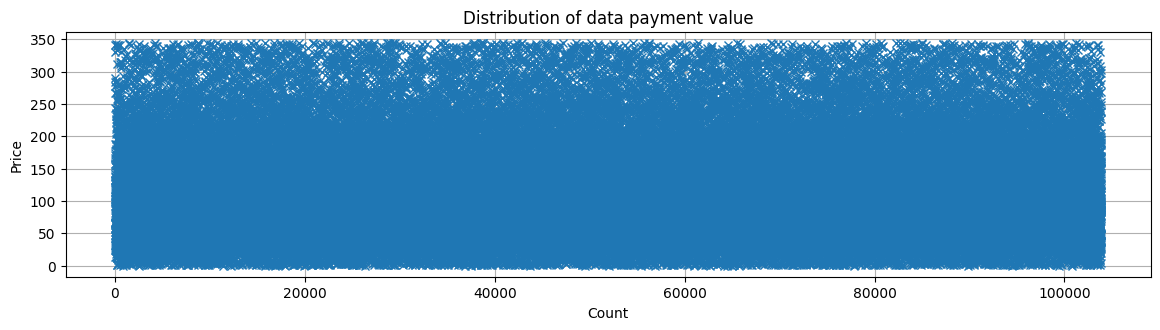

In [30]:
plt.figure(dpi=150)
plt.figure(figsize=(14,7))
plt.subplot(212)
plt.plot(order_payments['payment_value'], 'x')
plt.title('Distribution of data payment value')
plt.ylabel('Price')
plt.xlabel('Count')
plt.grid()
plt.show()

In [33]:
order_payments[['payment_value', 'payment_installments']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
payment_value,95902.0,110.065576,72.783589,0.0,54.0,92.2,150.58,344.34
payment_installments,95902.0,2.628371,2.451603,0.0,1.0,1.0,3.00,24.00


4. Exportando o DataFrame para um novo arquivo CSV

In [31]:
import os

In [34]:
data_directory = '../data/'

clean_data_directory = os.path.join(data_directory, 'clean_data')

os.makedirs(clean_data_directory, exist_ok=True)

csv_path = os.path.join(clean_data_directory, 'order_payments_dataset.csv')

order_payments.to_csv(csv_path, index=False)

print(f'DataFrame salvo em {csv_path}')

DataFrame salvo em ../data/clean_data/order_payments_dataset.csv
